In [1]:
using Revise
using MDToolbox, PyPlot, Statistics, LinearAlgebra
PyPlot.plt.style.use("seaborn-colorblind")
ENV["COLUMNS"] = 110; #display width for MDToolbox

-----

In [2]:
#s = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_all.ene")
s1 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param1_all.log")
s2 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param2_all.log")
s3 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param3_all.log")
s4 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param4_all.log")
s5 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param5_all.log")
s6 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param6_all.log")
s7 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param7_all.log")
s8 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param8_all.log")

2600026-element Vector{String}:
 "INFO:       STEP            TIME       TOTAL_ENE   POTENTIAL_ENE     KINETIC_ENE            RMSG            BOND           ANGLE    UREY-BRADLEY        DIHEDRAL        IMPROPER            CMAP         VDWAALS           ELECT     TEMPERATURE          VOLUME"
 " --------------- --------------- --------------- --------------- ---------------"
 "INFO:        100          0.2500     -66185.0845     -81070.2991      14885.2147         13.9581        441.5869        942.7722        112.2471       1187.6620         59.5290        -75.9746       8137.7873     -91875.9091        297.6114     229068.8489"
 ""
 "INFO:        200          0.5000     -65539.8397     -80558.6558      15018.8161         13.9489        402.4801        898.9603        104.6870       1203.6921         72.7816        -77.7459       8154.2791     -91317.7901        300.2826     229068.8489"
 ""
 "INFO:        300          0.7500     -65566.5273     -80439.0813      14872.5539         13.89

In [3]:
N = 13000 #トラジェクトリファイルのフレーム数
STEP = zeros(Int,N)
ENERGY_1 = zeros(Float32,N)
ENERGY_2 = zeros(Float32,N)
ENERGY_3 = zeros(Float32,N)
ENERGY_4 = zeros(Float32,N)
ENERGY_5 = zeros(Float32,N)
ENERGY_6 = zeros(Float32,N)
ENERGY_7 = zeros(Float32,N)
ENERGY_8 = zeros(Float32,N)

13000-element Vector{Float32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [4]:
k = 0
for i = 1:length(s1) #iは全体のエネルギーの探索
    if startswith(s1[i]," --------------- --------------- --------------- --------------- ---------------") #ここからはじまり
        for j = 1:1000 #N #jは10000000ステップの中での探索(エネルギーは100ステップおきに出力)　このエネルギーを100でストライドしたトラジェクトリに対応させる
            k = k + 1
            STEP[k] = parse(Int,s1[i+j*200-1][8:16])     
            ENERGY_1[k] = parse(Float32,s1[i+j*200-1][53:64])
            ENERGY_2[k] = parse(Float32,s2[i+j*200-1][53:64]) 
            ENERGY_3[k] = parse(Float32,s3[i+j*200-1][53:64]) 
            ENERGY_4[k] = parse(Float32,s4[i+j*200-1][53:64]) 
            ENERGY_5[k] = parse(Float32,s5[i+j*200-1][53:64]) 
            ENERGY_6[k] = parse(Float32,s6[i+j*200-1][53:64]) 
            ENERGY_7[k] = parse(Float32,s7[i+j*200-1][53:64]) 
            ENERGY_8[k] = parse(Float32,s8[i+j*200-1][53:64]) 
        end
    end
end

In [5]:
#検証取り出したものがあっているのか？

E_1 = zeros(Float32,N)
E_2 = zeros(Float32,N)
E_3 = zeros(Float32,N)
E_4 = zeros(Float32,N)
E_5 = zeros(Float32,N)
E_6 = zeros(Float32,N)
E_7 = zeros(Float32,N)
E_8 = zeros(Float32,N)

k2 = 0
for i = 1:length(s1) #iは全体のエネルギーの探索
    if startswith(s1[i]," --------------- --------------- --------------- --------------- ---------------") #ここからはじまり
        for j = 1:1000 #N #jは10000000ステップの中での探索(エネルギーは100ステップおきに出力)　このエネルギーを100でストライドしたトラジェクトリに対応させる
            k2 = k2 + 1   
            E_1[k2] = parse(Float32,s1[i+j*200-1][53:64]) 
            E_2[k2] = parse(Float32,s2[i+j*200-1][53:64]) 
            E_3[k2] = parse(Float32,s3[i+j*200-1][53:64]) 
            E_4[k2] = parse(Float32,s4[i+j*200-1][53:64]) 
            E_5[k2] = parse(Float32,s5[i+j*200-1][53:64]) 
            E_6[k2] = parse(Float32,s6[i+j*200-1][53:64]) 
            E_7[k2] = parse(Float32,s7[i+j*200-1][53:64]) 
            E_8[k2] = parse(Float32,s8[i+j*200-1][53:64])
        end
    end
end

In [6]:
E_1

13000-element Vector{Float32}:
 -80846.375
 -80685.17
 -80684.49
 -80766.34
 -80548.62
 -80729.84
 -80425.53
 -80742.69
 -80429.79
 -80650.17
 -80637.48
 -80817.97
 -80385.445
      ⋮
 -80828.89
 -80762.07
 -80850.414
 -80688.484
 -80667.62
 -80798.31
 -80863.26
 -80636.9
 -80746.305
 -80805.96
 -80713.875
 -80709.97

In [7]:
k

13000

In [8]:
STEP

13000-element Vector{Int64}:
    10000
    20000
    30000
    40000
    50000
    60000
    70000
    80000
    90000
   100000
   110000
   120000
   130000
        ⋮
  9890000
  9900000
  9910000
  9920000
  9930000
  9940000
  9950000
  9960000
  9970000
  9980000
  9990000
 10000000

In [9]:
ENERGY_1

13000-element Vector{Float32}:
 -80846.375
 -80685.17
 -80684.49
 -80766.34
 -80548.62
 -80729.84
 -80425.53
 -80742.69
 -80429.79
 -80650.17
 -80637.48
 -80817.97
 -80385.445
      ⋮
 -80828.89
 -80762.07
 -80850.414
 -80688.484
 -80667.62
 -80798.31
 -80863.26
 -80636.9
 -80746.305
 -80805.96
 -80713.875
 -80709.97

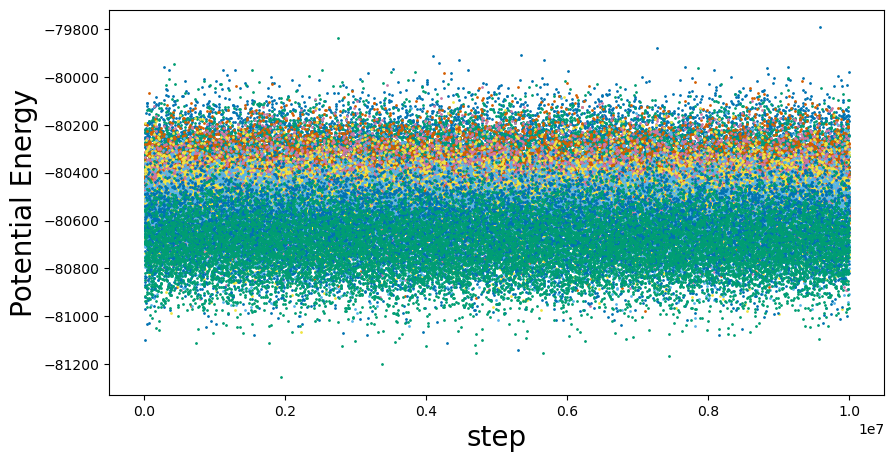

In [10]:
fig, ax = subplots(figsize=(10, 5));
ax.scatter(STEP,E_8, s=1);
ax.scatter(STEP,E_7, s=1);
ax.scatter(STEP,E_6, s=1);
ax.scatter(STEP,E_5, s=1);
ax.scatter(STEP,E_4, s=1);
ax.scatter(STEP,E_3, s=1);
ax.scatter(STEP,E_2, s=1);
ax.scatter(STEP,E_1, s=1);
#xlim([0, 100000])
#ylim([11.28, 11.31])
xlabel("step",fontsize=20);
ylabel("Potential Energy",fontsize=20);
xticks(fontsize=10);
yticks(fontsize=10);

savefig("4krnALL_param_ene.png", dpi=350, bbox_inches="tight");

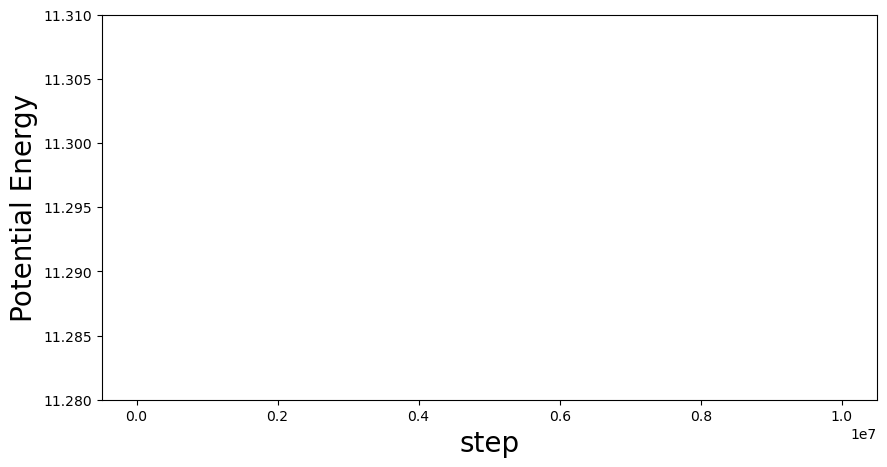

In [11]:
fig, ax = subplots(figsize=(10, 5));
ax.scatter(STEP,ENERGY_8, s=2.0);
#xlim([0, 100000])
ylim([11.28, 11.31])
xlabel("step",fontsize=20);
ylabel("Potential Energy",fontsize=20);
xticks(fontsize=10);
yticks(fontsize=10);

#savefig("b.png", dpi=350, bbox_inches="tight");

In [12]:
#RMSDの計算
pdb_xtal = readpdb("/data/higashi/new_4krn/ALL_gREST_4KRN/ground_truth.pdb");
pdb_xtal = pdb_xtal["(atomname CA) and (resid 100:120)"];
pdb_init = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/prot.pdb");

ta1 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param1_all_s100.nc");
ta2 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param2_all_s100.nc");
ta3 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param3_all_s100.nc");
ta4 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param4_all_s100.nc");
ta5 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param5_all_s100.nc");
ta6 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param6_all_s100.nc");
ta7 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param7_all_s100.nc");
ta8 = mdload("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/run_param8_all_s100.nc");

TA1 = [pdb_init; ta1]
TA1 = TA1["(atomname CA) and (resid 100:120)"]
ta_fitted_1 = superimpose(pdb_xtal, TA1);
rmsd1 = compute_rmsd(pdb_xtal, ta_fitted_1)

TA2 = [pdb_init; ta2]
TA2 = TA2["(atomname CA) and (resid 100:120)"]
ta_fitted_2 = superimpose(pdb_xtal, TA2);
rmsd2 = compute_rmsd(pdb_xtal, ta_fitted_2)

TA3 = [pdb_init; ta3]
TA3 = TA3["(atomname CA) and (resid 100:120)"]
ta_fitted_3 = superimpose(pdb_xtal, TA3);
rmsd3 = compute_rmsd(pdb_xtal, ta_fitted_3)

TA4 = [pdb_init; ta4]
TA4 = TA4["(atomname CA) and (resid 100:120)"]
ta_fitted_4 = superimpose(pdb_xtal, TA4);
rmsd4 = compute_rmsd(pdb_xtal, ta_fitted_4)

TA5 = [pdb_init; ta5]
TA5 = TA5["(atomname CA) and (resid 100:120)"]
ta_fitted_5 = superimpose(pdb_xtal, TA5);
rmsd5 = compute_rmsd(pdb_xtal, ta_fitted_5)

TA6 = [pdb_init; ta6]
TA6 = TA6["(atomname CA) and (resid 100:120)"]
ta_fitted_6 = superimpose(pdb_xtal, TA6);
rmsd6 = compute_rmsd(pdb_xtal, ta_fitted_6)

TA7 = [pdb_init; ta7]
TA7 = TA7["(atomname CA) and (resid 100:120)"]
ta_fitted_7 = superimpose(pdb_xtal, TA7);
rmsd7 = compute_rmsd(pdb_xtal, ta_fitted_7)

TA8 = [pdb_init; ta8]
TA8 = TA8["(atomname CA) and (resid 100:120)"]
ta_fitted_8 = superimpose(pdb_xtal, TA8);
rmsd8 = compute_rmsd(pdb_xtal, ta_fitted_8)

13001-element Vector{Float64}:
 4.921229789175185
 3.790372245803948
 4.329640065154647
 4.17567920677902
 3.959450421636256
 5.231140228197589
 5.257593210741972
 4.881046933581588
 3.676890700028939
 3.6272579137517806
 4.299921795131362
 5.320598035777094
 5.305607618789666
 ⋮
 2.4991154932841093
 2.630444750662593
 2.4821192796424416
 3.275550530123677
 3.1522595807336153
 2.298302189314645
 2.324194870809919
 2.977724967965479
 3.028139238257284
 2.28739513984483
 3.0382853536566867
 3.4460421119958715

In [13]:
rmsd_N_1 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_2 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_3 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_4 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_5 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_6 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_7 = zeros(Float32,N) #zeros(Float32,N)
rmsd_N_8 = zeros(Float32,N) #zeros(Float32,N)

for i = 1:N #サイズ合わせる
    rmsd_N_1[i] = rmsd1[i]
    rmsd_N_2[i] = rmsd2[i]
    rmsd_N_3[i] = rmsd3[i]
    rmsd_N_4[i] = rmsd4[i]
    rmsd_N_5[i] = rmsd5[i]
    rmsd_N_6[i] = rmsd6[i]
    rmsd_N_7[i] = rmsd7[i]
    rmsd_N_8[i] = rmsd8[i]
end

In [14]:
rmsd_N_1

13000-element Vector{Float32}:
 4.92123
 4.3383474
 3.8562784
 3.853143
 4.026577
 3.8894308
 5.458187
 4.4206567
 3.8713713
 4.3961215
 4.3522778
 4.231886
 4.316192
 ⋮
 3.0556579
 3.1546507
 3.4427881
 3.1559207
 3.104143
 3.9039595
 3.1945803
 3.2467952
 4.0486774
 3.0941308
 3.3511436
 3.3815467

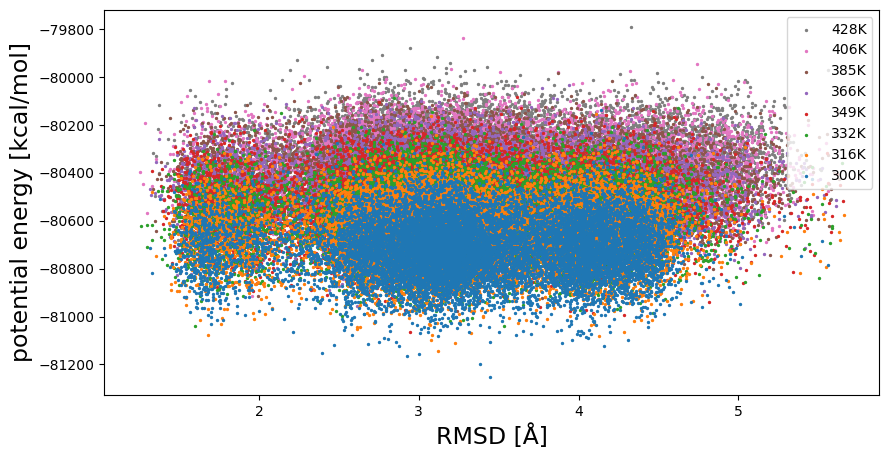

In [21]:
fig, ax = subplots(figsize=(10, 5));
ax.scatter(rmsd_N_8,ENERGY_8, s=2.0, c="#7f7f7f", label="428K");
ax.scatter(rmsd_N_7,ENERGY_7, s=2.0, c="#e377c2", label="406K");
ax.scatter(rmsd_N_6,ENERGY_6, s=2.0, c="#8c564b", label="385K");
ax.scatter(rmsd_N_5,ENERGY_5, s=2.0, c="#9467bd", label="366K");
ax.scatter(rmsd_N_4,ENERGY_4, s=2.0, c="#d62728", label="349K");
ax.scatter(rmsd_N_3,ENERGY_3, s=2.0, c="#2ca02c", label="332K");
ax.scatter(rmsd_N_2,ENERGY_2, s=2.0, c="#ff7f0e", label="316K");
ax.scatter(rmsd_N_1,ENERGY_1, s=2.0, c="#1f77b4", label="300K");
ax.legend(loc="upper right")
#xlim([0, 8])
#ylim([-82000, -79100])
xlabel("RMSD [Å]",fontsize=17);
ylabel("potential energy [kcal/mol]",fontsize=17);
xticks(fontsize=10);
yticks(fontsize=10);

savefig("ene_RMSD_4krnALL.png", dpi=350, bbox_inches="tight");

In [16]:
#なぜエネルギーの幅がずれているのか?

str1 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/new1/remd_convert/run_param1.log")
str2 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/new1/remd_convert/run_param2.log")
str3 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/new1/remd_convert/run_param3.log")
str4 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/new1/remd_convert/run_param4.log")
str5 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/new1/remd_convert/run_param5.log")
str6 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/new1/remd_convert/run_param6.log")
str7 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/new1/remd_convert/run_param7.log")
str8 = readlines("/data/higashi/new_4krn/ALL_gREST_4KRN/06_grest_production/new1/remd_convert/run_param8.log")

200002-element Vector{String}:
 "INFO:       STEP            TIME       TOTAL_ENE   POTENTIAL_ENE     KINETIC_ENE            RMSG            BOND           ANGLE    UREY-BRADLEY        DIHEDRAL        IMPROPER            CMAP         VDWAALS           ELECT     TEMPERATURE          VOLUME"
 " --------------- --------------- --------------- --------------- ---------------"
 "INFO:        100          0.2500     -66185.0845     -81070.2991      14885.2147         13.9581        441.5869        942.7722        112.2471       1187.6620         59.5290        -75.9746       8137.7873     -91875.9091        297.6114     229068.8489"
 ""
 "INFO:        200          0.5000     -65539.8397     -80558.6558      15018.8161         13.9489        402.4801        898.9603        104.6870       1203.6921         72.7816        -77.7459       8154.2791     -91317.7901        300.2826     229068.8489"
 ""
 "INFO:        300          0.7500     -65566.5273     -80439.0813      14872.5539         13.897

In [17]:
N2 = 10000 #100000 dihed3000 トラジェクトリファイルのフレーム数
ENE_1 = zeros(Float32,N2)
ENE_2 = zeros(Float32,N2)
ENE_3 = zeros(Float32,N2)
ENE_4 = zeros(Float32,N2)
ENE_5 = zeros(Float32,N2)
ENE_6 = zeros(Float32,N2)
ENE_7 = zeros(Float32,N2)
ENE_8 = zeros(Float32,N2)
STEP3 = zeros(Int,N2)

10000-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [18]:
k3 = 0
for i = 1:length(str1) #iは全体のエネルギーの探索
    if startswith(str1[i]," --------------- --------------- --------------- --------------- ---------------") #ここからはじまり
        for j = 1:10000 #N #jは10000000ステップの中での探索(エネルギーは100ステップおきに出力)　このエネルギーを1000でストライドしたトラジェクトリに対応するように抽出していく
            k3 = k3 + 1       
            STEP3[k3] = parse(Int,str1[i+j*20-1][8:16])   
            ENE_1[k3] = log(-parse(Float32,str1[i+j*20-1][53:64])) 
            ENE_2[k3] = log(-parse(Float32,str2[i+j*20-1][53:64])) 
            ENE_3[k3] = log(-parse(Float32,str3[i+j*20-1][53:64])) 
            ENE_4[k3] = log(-parse(Float32,str4[i+j*20-1][53:64])) 
            ENE_5[k3] = log(-parse(Float32,str5[i+j*20-1][53:64])) 
            ENE_6[k3] = log(-parse(Float32,str6[i+j*20-1][53:64])) 
            ENE_7[k3] = log(-parse(Float32,str7[i+j*20-1][53:64])) 
            ENE_8[k3] = log(-parse(Float32,str8[i+j*20-1][53:64])) 
            
        end
    end
end

In [19]:
STEP3

10000-element Vector{Int64}:
     1000
     2000
     3000
     4000
     5000
     6000
     7000
     8000
     9000
    10000
    11000
    12000
    13000
        ⋮
  9989000
  9990000
  9991000
  9992000
  9993000
  9994000
  9995000
  9996000
  9997000
  9998000
  9999000
 10000000

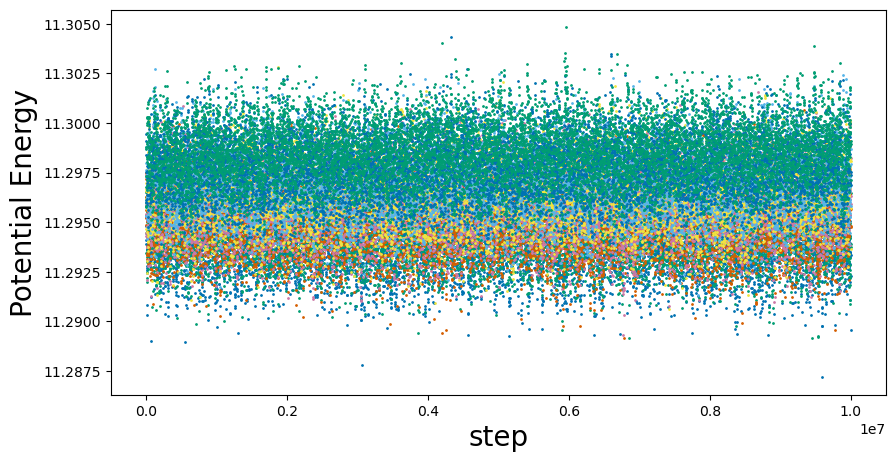

In [20]:
fig, ax = subplots(figsize=(10, 5));
ax.scatter(STEP3,ENE_8, s=1);
ax.scatter(STEP3,ENE_7, s=1);
ax.scatter(STEP3,ENE_6, s=1);
ax.scatter(STEP3,ENE_5, s=1);
ax.scatter(STEP3,ENE_4, s=1);
ax.scatter(STEP3,ENE_3, s=1);
ax.scatter(STEP3,ENE_2, s=1);
ax.scatter(STEP3,ENE_1, s=1);
#xlim([0, 100000])
#ylim([11.28, 11.31])
xlabel("step",fontsize=20);
ylabel("Potential Energy",fontsize=20);
xticks(fontsize=10);
yticks(fontsize=10);

#savefig("4krnALL_param_ene.png", dpi=350, bbox_inches="tight");